In [38]:
library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(tidyr)
library(ggpubr)

library(readxl)
library(patchwork)
library(RColorBrewer)

library(viridis)
library(ggvenn)

In [40]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/Eva/opt/anaconda3/envs/R4b/lib/libopenblasp-r0.3.26.dylib;  LAPACK version 3.12.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: system (macOS)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggvenn_0.1.10      viridis_0.6.4      viridisLite_0.4.2  RColorBrewer_1.1-3
 [5] patchwork_1.1.2    readxl_1.4.3       ggpubr_0.6.0       ggplot2_3.5.0     
 [9] tidyr_1.3.1        cowplot_1.1.1      stringr_1.5.1      rio_1.0.1         
[13] dplyr_1.1.4       

loaded via a namespace (and not attached):
 [1] utf8_1.2.4        generics_0.1.3    rstatix_0.7.2     stringi_1.8.3    
 [5] digest_0.6.35     magrittr_2.0.3    evaluate_0.23     pbdZMQ_0.3-11    
 [9] fastmap_1.1.1   

I run SynMap on the CoGe server (https://genomevolution.org/coge/)
I used the Atlatic v3 genome assembly and this gff3 file: ATL_v3.hc_gene_models.gff3 (vv3, 2024-09-03 10:48:34, id155619) to run SynMap between this genome and itself. 


In [2]:
## Import Kn and Ks data
#:::::::::::::::::::::::::
CoGeSynMap <- read.table(text = gsub('\\|\\|', "\t", readLines("20250326_Results_CoGe.txt")),
                         comment.char = "#", sep = '\t')

In [3]:
CoGeSynMap[1:2,]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,⋯,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,0.0956,0.0429,a68664_10_0,10_0,24804675,24807840,Soltu.Atl_v3.10_0G015540.1,-1,CDS,4445192778,⋯,Soltu.Atl_v3.10_0G018890.2,-1,CDS,4445194791,3368,97.45,28169777,28166815,1e-250,50
2,0.0276,0.0033,a68664_10_0,10_0,24813593,24819428,Soltu.Atl_v3.10_0G015550.1,-1,CDS,4445192781,⋯,Soltu.Atl_v3.10_0G018900.1,-1,CDS,4445194815,3376,99.05,28180296,28175356,1e-250,100


**NOTE:** there are 2 start and stops for each gene, one seems to have direction information. I am giving them separate names so that all columns have different names. 




In [4]:
Header<- c('Ks','Kn','a_db_genome_id','chr1','start1',
        'stop1','name1','strand1','type1','db_feature_id1',
    'genome_order1','percent_id1','start1_B','stop1_B','b_db_genome_id',
'chr2','start2','stop2','name2','strand2','type2',
    'db_feature_id2','genome_order2','percent_id2','start2_B','stop2_B','eval','block_score','GEVO_link')

In [5]:
Header

[1] "Ks"             "Kn"             "a_db_genome_id" "chr1"          
 [5] "start1"         "stop1"          "name1"          "strand1"       
 [9] "type1"          "db_feature_id1" "genome_order1"  "percent_id1"   
[13] "start1_B"       "stop1_B"        "b_db_genome_id" "chr2"          
[17] "start2"         "stop2"          "name2"          "strand2"       
[21] "type2"          "db_feature_id2" "genome_order2"  "percent_id2"   
[25] "start2_B"       "stop2_B"        "eval"           "block_score"   
[29] "GEVO_link"

In [6]:
length(Header)
ncol(CoGeSynMap)

[1] 29

[1] 28

In [7]:
## Remove column name GEVO_link since there is no link in this output
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
HeaderB <- Header[1:28]
HeaderB

[1] "Ks"             "Kn"             "a_db_genome_id" "chr1"          
 [5] "start1"         "stop1"          "name1"          "strand1"       
 [9] "type1"          "db_feature_id1" "genome_order1"  "percent_id1"   
[13] "start1_B"       "stop1_B"        "b_db_genome_id" "chr2"          
[17] "start2"         "stop2"          "name2"          "strand2"       
[21] "type2"          "db_feature_id2" "genome_order2"  "percent_id2"   
[25] "start2_B"       "stop2_B"        "eval"           "block_score"

In [8]:
colnames(CoGeSynMap) <- HeaderB

In [9]:
head(CoGeSynMap)
tail(CoGeSynMap)

,Ks,Kn,a_db_genome_id,chr1,start1,stop1,name1,strand1,type1,db_feature_id1,⋯,name2,strand2,type2,db_feature_id2,genome_order2,percent_id2,start2_B,stop2_B,eval,block_score
,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,⋯,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,0.0956,0.0429,a68664_10_0,10_0,24804675,24807840,Soltu.Atl_v3.10_0G015540.1,-1,CDS,4445192778,⋯,Soltu.Atl_v3.10_0G018890.2,-1,CDS,4445194791,3368,97.45,28169777,28166815,1.0e-250,50
2,0.0276,0.0033,a68664_10_0,10_0,24813593,24819428,Soltu.Atl_v3.10_0G015550.1,-1,CDS,4445192781,⋯,Soltu.Atl_v3.10_0G018900.1,-1,CDS,4445194815,3376,99.05,28180296,28175356,1.0e-250,100
3,38.4927,1.4706,a68664_10_0,10_0,24830339,24833361,Soltu.Atl_v3.10_0G015600.1,-1,CDS,4445192799,⋯,Soltu.Atl_v3.10_0G018910.1,-1,CDS,4445194824,3379,98.48,28181825,28181270,2.4e-225,150
4,0.0763,0.0164,a68664_10_0,10_0,24834186,24834773,Soltu.Atl_v3.10_0G015610.1,1,CDS,4445192805,⋯,Soltu.Atl_v3.10_0G019010.1,1,CDS,4445194881,3398,97.28,28222998,28223585,1.0e-250,200
5,0.0150,0.0197,a68664_10_0,10_0,24843865,24844422,Soltu.Atl_v3.10_0G015620.1,-1,CDS,4445192808,⋯,Soltu.Atl_v3.10_0G019120.1,-1,CDS,4445194944,3419,98.21,28273987,28273430,1.0e-250,250
6,0.0786,0.0336,a68664_10_0,10_0,24853795,24857031,Soltu.Atl_v3.10_0G015640.1,1,CDS,4445192814,⋯,Soltu.Atl_v3.10_0G019240.1,1,CDS,4445194980,3431,97.36,28345258,28348476,1.0e-250,297


,Ks,Kn,a_db_genome_id,chr1,start1,stop1,name1,strand1,type1,db_feature_id1,⋯,name2,strand2,type2,db_feature_id2,genome_order2,percent_id2,start2_B,stop2_B,eval,block_score
,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,⋯,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
213649,0.0228,0.0055,a68664_scf_99,scf_99,134060,145555,Soltu.Atl_v3.S008650.1,-1,CDS,4445991408,⋯,Soltu.Atl_v3.12_3G017450.1,-1,CDS,4445314446,42925,98.94,43632234,43620781,1.0e-250,150
213650,0.2351,0.1818,a68664_scf_99,scf_99,217885,221820,Soltu.Atl_v3.S008680.1,-1,CDS,4445991411,⋯,Soltu.Atl_v3.12_3G017470.1,-1,CDS,4445314449,42926,99.52,43748423,43743615,1.0e-250,197
213651,0.0256,0.0044,a68664_scf_99,scf_99,233260,234328,Soltu.Atl_v3.S008700.2,-1,CDS,4445991420,⋯,Soltu.Atl_v3.12_3G017500.1,-1,CDS,4445314461,42930,98.90,43759249,43758108,2.6e-177,247
213652,0.0712,0.0232,a68664_scf_99,scf_99,245300,253928,Soltu.Atl_v3.S008710.1,1,CDS,4445991423,⋯,Soltu.Atl_v3.12_3G017520.1,1,CDS,4445314467,42932,99.17,43792921,43797859,1.0e-250,297
213653,0.0329,0.0063,a68664_scf_99,scf_99,264147,268248,Soltu.Atl_v3.S008720.1,-1,CDS,4445991441,⋯,Soltu.Atl_v3.12_3G017530.1,-1,CDS,4445314470,42933,98.17,43817756,43813658,1.0e-250,347
213654,0.0861,0.0444,a68664_scf_99,scf_99,331915,334175,Soltu.Atl_v3.S008730.1,1,CDS,4445991453,⋯,Soltu.Atl_v3.12_3G017570.1,1,CDS,4445314473,42934,99.32,43883529,43885834,5.5e-215,394


In [10]:
#CHECK FOR NA VALUES: 
#::::::::::::::::::::;
CoGeSynMap %>% nrow()
CoGeSynMap %>% na.omit() %>% nrow()
sum(is.na(CoGeSynMap))

[1] 213654

[1] 213469

[1] 370

In [11]:
## REMOVE NAs
#::::::::::::
CoGeSynMap <- CoGeSynMap %>% na.omit()
sum(is.na(CoGeSynMap))


[1] 0

In [12]:
### Check for duplicates, multiple transcript names by selecting just the gene names. 
#######################################################################################

GeneNamesTranscript <- CoGeSynMap %>% select(name2, name1) 
print('This is the number of allelic pairs in the dataframe')
nrow(GeneNamesTranscript)

print('This is the number of unique allelic pairs in the dataframe')
GeneNamesTranscript %>% unique() %>% nrow()

print('This is the number of rows with NA values')
sum(is.na(GeneNamesTranscript))

Duplicates<- GeneNamesTranscript %>% group_by(name1,name2) %>% filter(n() >1) %>% 
            ungroup %>% arrange(name2)
head(Duplicates)
print('This is the number of duplicates')
nrow(Duplicates)

[1] "This is the number of allelic pairs in the dataframe"


[1] 213469

[1] "This is the number of unique allelic pairs in the dataframe"


[1] 213341

[1] "This is the number of rows with NA values"


[1] 0

name2,name1
<chr>,<chr>
Soltu.Atl_v3.01_0G019330.1,Soltu.Atl_v3.01_3G036260.1
Soltu.Atl_v3.01_0G019330.1,Soltu.Atl_v3.01_3G036260.1
Soltu.Atl_v3.01_0G019520.1,Soltu.Atl_v3.01_3G036200.1
Soltu.Atl_v3.01_0G019520.1,Soltu.Atl_v3.01_3G036200.1
Soltu.Atl_v3.01_0G019650.1,Soltu.Atl_v3.01_3G036100.1
Soltu.Atl_v3.01_0G019650.1,Soltu.Atl_v3.01_3G036100.1


[1] "This is the number of duplicates"


[1] 256

In [13]:
CoGeSynMap %>% filter(name2 %in% Duplicates$name2) %>% head()

,Ks,Kn,a_db_genome_id,chr1,start1,stop1,name1,strand1,type1,db_feature_id1,⋯,name2,strand2,type2,db_feature_id2,genome_order2,percent_id2,start2_B,stop2_B,eval,block_score
,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,⋯,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,0.0488,0.0166,a68664_10_0,10_0,18586702,18592787,Soltu.Atl_v3.10_0G009090.1,1,CDS,4445189406,⋯,Soltu.Atl_v3.10_0G018710.3,-1,CDS,4445194659,3324,98.15,28036632,28030441,7e-128,297
2,0.0488,0.0166,a68664_10_0,10_0,18586702,18592787,Soltu.Atl_v3.10_0G009090.1,1,CDS,4445189406,⋯,Soltu.Atl_v3.10_0G018710.3,-1,CDS,4445194659,3324,98.15,28036632,28030441,7e-128,200
3,0.0000,0.0044,a68664_10_0,10_0,584684,587566,Soltu.Atl_v3.10_0G000490.3,1,CDS,4445184837,⋯,Soltu.Atl_v3.10_1G000450.2,-1,CDS,4445196219,3843,99.66,428651,425796,1e-250,1650
4,0.0000,0.0044,a68664_10_0,10_0,584684,587566,Soltu.Atl_v3.10_0G000490.3,1,CDS,4445184837,⋯,Soltu.Atl_v3.10_1G000450.2,-1,CDS,4445196219,3843,99.66,428651,425796,1e-250,250
5,0.0726,0.0160,a68664_10_0,10_0,605589,607958,Soltu.Atl_v3.10_0G000510.1,-1,CDS,4445184852,⋯,Soltu.Atl_v3.10_2G000380.1,1,CDS,4445203008,6095,98.22,488803,491104,1e-250,1650
6,38.5025,1.1832,a68664_10_0,10_0,26988274,26993392,Soltu.Atl_v3.10_0G017870.1,-1,CDS,4445194164,⋯,Soltu.Atl_v3.10_2G013880.1,-1,CDS,4445211000,8747,97.03,17098214,17093137,1e-250,1444


**NOTE:** These duplicates are caused by different block_score values in otherwise identical rows

I found this information about block_scores here:
https://data.usgs.gov/datacatalog/metadata/USGS.61253eefd34e40dd9c03f2f5.xml

"Assigned by SynMap, with larger increments given as more similar gene pairs are added to the synteny block. This column is useful for arranging the gene pairs in synteny blocks in the order of appearance in the genome, by sorting ascending or descending."

This seems for just assigning synthenic order, but does not influence Kn or Ks data. 

#### Remove block_score value column to remove those duplicates

In [14]:
nrow(CoGeSynMap)
CoGeSynMap %>% select(-block_score) %>% unique() %>% nrow()


[1] 213469

[1] 213341

In [15]:
CoGeSynMap<- CoGeSynMap %>% select(-block_score) %>% unique() 

## Select allelic pairs expressed in our experiments

In [16]:
### Import our allelic group list
#::::::::::::::::::::::::::::::::::
SynPairs<- import(file = '../ATL_ExpressedAllelicPairs/Results/ExpressedAllelicPairs.csv',
                 sep =',', header = TRUE, fill = TRUE )

In [17]:
SynPairs[1:2,]

,Syntelog,Alleles,Allele1,Allele2
,<chr>,<int>,<chr>,<chr>
1,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_2G000020.1
2,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_3G000040.1


In [18]:
nrow(SynPairs)

[1] 70044

In [19]:
CoGeSynMap[1:2,]

,Ks,Kn,a_db_genome_id,chr1,start1,stop1,name1,strand1,type1,db_feature_id1,⋯,stop2,name2,strand2,type2,db_feature_id2,genome_order2,percent_id2,start2_B,stop2_B,eval
,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,⋯,<int>,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
1,0.0956,0.0429,a68664_10_0,10_0,24804675,24807840,Soltu.Atl_v3.10_0G015540.1,-1,CDS,4445192778,⋯,28169777,Soltu.Atl_v3.10_0G018890.2,-1,CDS,4445194791,3368,97.45,28169777,28166815,1e-250
2,0.0276,0.0033,a68664_10_0,10_0,24813593,24819428,Soltu.Atl_v3.10_0G015550.1,-1,CDS,4445192781,⋯,28180296,Soltu.Atl_v3.10_0G018900.1,-1,CDS,4445194815,3376,99.05,28180296,28175356,1e-250


## Select allelic pairs identified in our synteny analyses

In [20]:
nrow(SynPairs)
nrow(CoGeSynMap)

[1] 70044

[1] 213341

In [21]:
CoGeSynMapExprA <- SynPairs %>% left_join(CoGeSynMap %>% select(Ks,Kn, name1, name2, percent_id1), by = c('Allele1'='name1', 'Allele2'='name2')) %>%
                    filter(!is.na(Ks))

nrow(CoGeSynMapExprA)

[1] 41341

In [22]:
CoGeSynMapExprA %>% group_by(Allele1, Allele2) %>% filter(n() == 2)

Syntelog,Alleles,Allele1,Allele2,Ks,Kn,percent_id1
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>


In [23]:
CoGeSynMapExprB <- SynPairs %>% left_join(CoGeSynMap %>% select(Ks,Kn, name1, name2, percent_id1), by = c('Allele1'='name2', 'Allele2'='name1')) %>%
                filter(!is.na(Ks))

nrow(CoGeSynMapExprB)

[1] 41242

In [24]:
CoGeSynMapExpr <- CoGeSynMapExprA %>% rbind(CoGeSynMapExprB) %>% unique()
head(CoGeSynMapExpr)
nrow(CoGeSynMapExpr )

,Syntelog,Alleles,Allele1,Allele2,Ks,Kn,percent_id1
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Synt_10,2,Soltu.Atl_v3.01_2G000110.1,Soltu.Atl_v3.01_3G000170.1,0.0438,0.0094,98.25
2,Synt_100,3,Soltu.Atl_v3.01_2G001750.2,Soltu.Atl_v3.01_3G001570.1,86.6671,0.4814,98.11
3,Synt_100,3,Soltu.Atl_v3.01_2G001750.2,Soltu.Atl_v3.01_4G001820.1,0.0233,0.0052,98.80
4,Synt_100,3,Soltu.Atl_v3.01_3G001570.1,Soltu.Atl_v3.01_4G001820.1,85.6832,0.4754,98.62
5,Synt_10004,2,Soltu.Atl_v3.04_0G000390.1,Soltu.Atl_v3.04_3G007510.1,0.0339,0.0031,99.23
6,Synt_10005,2,Soltu.Atl_v3.04_0G000410.1,Soltu.Atl_v3.04_3G007520.1,2.2099,0.3652,98.59


[1] 41953

## Import rhythmic data

In [25]:
SDLD<- import(file = , '../ATL_AllelicGroupRhythmicity/Results/ExpressedGenes_JTK_AllelicGroups.csv',
                                sep =',', header = TRUE, fill = TRUE )


In [26]:
SDLD[1:2,]

,Syntelog,Tissue,Condition,ATL_expressed_alleles,geneID,target_id,Average,SD,ATL_alleles,BH.Q,ADJ.P,Period,Adj_phase,Amplitude
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Synt_1,Leaf,LD,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_1G000020,7.395377,0.1577245,4,1,1,20,19,0.10051609
2,Synt_1,Leaf,LD,4,Soltu.Atl_v3.01_2G000020.1,Soltu.Atl_v3.01_2G000020,5.948141,0.1212230,4,1,1,20,4,0.09175902


In [27]:
CoGeSynMapExpr[1:2,]

,Syntelog,Alleles,Allele1,Allele2,Ks,Kn,percent_id1
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Synt_10,2,Soltu.Atl_v3.01_2G000110.1,Soltu.Atl_v3.01_3G000170.1,0.0438,0.0094,98.25
2,Synt_100,3,Soltu.Atl_v3.01_2G001750.2,Soltu.Atl_v3.01_3G001570.1,86.6671,0.4814,98.11


## Are cycling allelic pairs potentially more functionally similar than not cycling ones?


In [28]:
CoGeSynExprCyc <- CoGeSynMapExpr %>% select(Ks, Kn, Allele1, Allele2, percent_id1) %>% 
            left_join(SDLD %>% select(Condition, Tissue, Syntelog, geneID, ADJ.P), by =c ('Allele1' = 'geneID'), relationship = 'many-to-many')%>%
            rename(ADJ.P1 = ADJ.P) %>%
            left_join(SDLD %>% select(Condition, Tissue, geneID, ADJ.P), by =c ('Allele2' = 'geneID', 'Condition' = 'Condition', 'Tissue' = 'Tissue'))%>%
            rename(ADJ.P2 = ADJ.P) %>% 
            filter(!is.na(ADJ.P1), !is.na(ADJ.P2), !is.na(Ks))

CoGeSynExprCyc[1:2,]   
nrow(CoGeSynExprCyc)      
                

,Ks,Kn,Allele1,Allele2,percent_id1,Condition,Tissue,Syntelog,ADJ.P1,ADJ.P2
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,0.0438,0.0094,Soltu.Atl_v3.01_2G000110.1,Soltu.Atl_v3.01_3G000170.1,98.25,LD,Leaf,Synt_10,0.177511592,2.359821e-03
2,0.0438,0.0094,Soltu.Atl_v3.01_2G000110.1,Soltu.Atl_v3.01_3G000170.1,98.25,SD,Leaf,Synt_10,0.009413501,4.027794e-06


[1] 122688

#### What is the Ks and Kn distributions

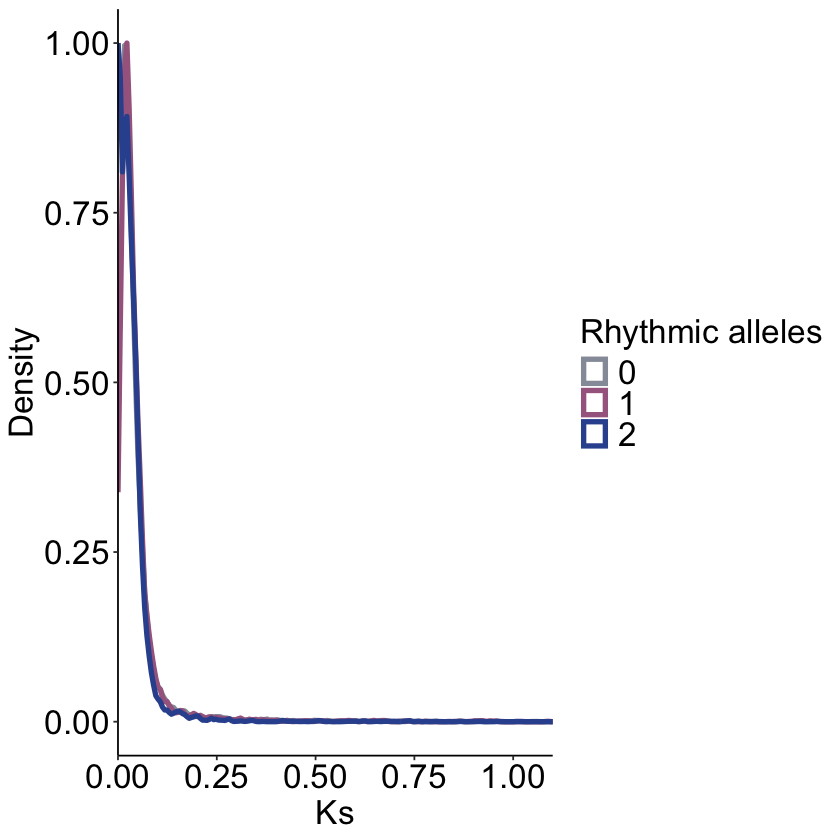

In [29]:
## Using SHORT DAY rhythmic data only, as that contains the most rhythmic genes
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Ks_plotSD <- CoGeSynExprCyc  %>% filter(!is.na(Syntelog), !is.na(Ks), !is.na(ADJ.P1), !is.na(ADJ.P2) ) %>% 
            filter (Ks < 3) %>% 
            
            mutate(Rhythmic_Alleles = case_when(ADJ.P1 < 0.001 & ADJ.P2 < 0.001 ~ '2',
                                        ADJ.P1 >= 0.001 & ADJ.P2 >= 0.001  ~ '0',
                                      ADJ.P1 < 0.001 & ADJ.P2 >= 0.001  ~ '1',
                                       ADJ.P1 >= 0.001 & ADJ.P2 < 0.001 ~'1')) %>% 

            mutate(Rhythmic_Alleles = factor(Rhythmic_Alleles, levels = c('0','1','2'))) %>%
            filter(!is.na(Rhythmic_Alleles)) %>%

    ggplot( aes(x=Ks  , color = Rhythmic_Alleles, y = after_stat(scaled))) +

    geom_density(linewidth = 1.5)+
     coord_cartesian(xlim=c(-0,1.1))+
        scale_x_continuous(expand = expansion(mult = c(0, 0)))+
         labs(y="Density", x="Ks")+

   
        theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                strip.text.x = element_text(size = 20),
                legend.text=element_text(size=20),
                legend.title=element_text(size=20)
            )+
                
            
scale_color_manual('Rhythmic alleles', values = c('2' = '#33539E',  ##1F449C #darker blue/grey
                                    '1'= '#A5678E',   ##7CA1CC
                                      '0' = '#969ba8')) # blue

Ks_plotSD

In [30]:
Ks_plotSD %>% ggsave(file="./Results/CoGesyn_Ks_Plot.pdf", 
                            width=7, height=6, dpi=600)

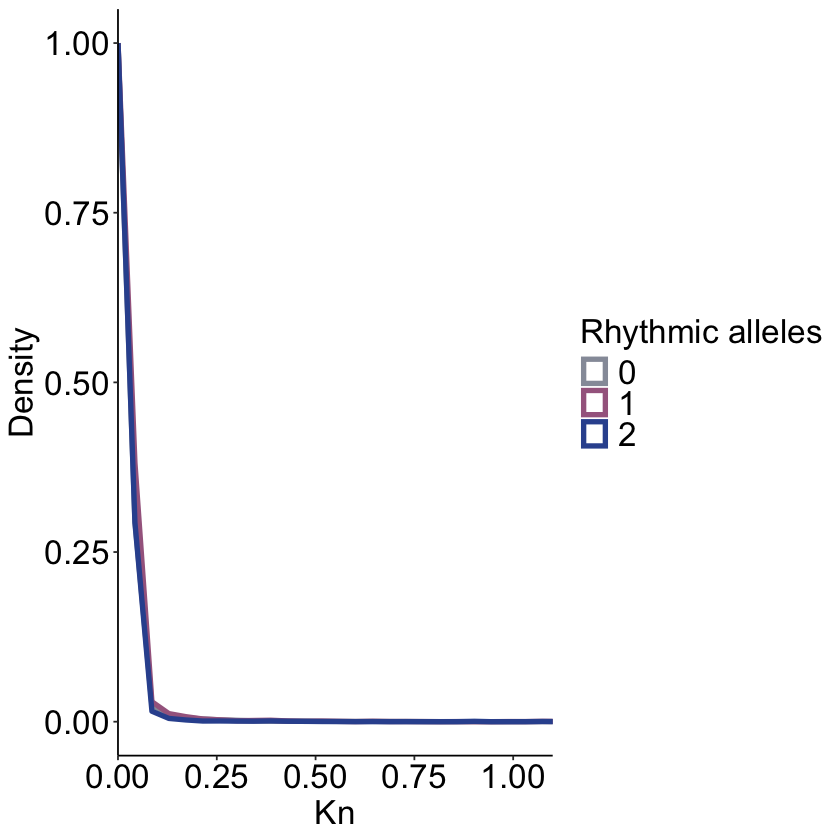

In [31]:
Kn_plotSD <- CoGeSynExprCyc  %>% filter(!is.na(Syntelog), !is.na(Ks), !is.na(ADJ.P1), !is.na(ADJ.P2) ) %>% 
            filter (Ks < 3) %>% 
            
            mutate(Rhythmic_Alleles = case_when(ADJ.P1 < 0.001 & ADJ.P2 < 0.001 ~ '2',
                                        ADJ.P1 >= 0.001 & ADJ.P2 >= 0.001  ~ '0',
                                      ADJ.P1 < 0.001 & ADJ.P2 >= 0.001  ~ '1',
                                       ADJ.P1 >= 0.001 & ADJ.P2 < 0.001 ~'1')) %>% 

            mutate(Rhythmic_Alleles = factor(Rhythmic_Alleles, levels = c('0','1','2'))) %>%
            filter(!is.na(Rhythmic_Alleles)) %>%

    ggplot( aes(x=Kn  , color = Rhythmic_Alleles, y = after_stat(scaled))) +

    geom_density(linewidth = 1.5)+
     coord_cartesian(xlim=c(-0,1.1))+
        scale_x_continuous(expand = expansion(mult = c(0, 0)))+
         labs(y="Density", x="Kn")+

   
        theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                strip.text.x = element_text(size = 20),
                legend.text=element_text(size=20),
                legend.title=element_text(size=20)
            )+
                
            
scale_color_manual('Rhythmic alleles', values = c('2' = '#33539E',  ##1F449C #darker blue/grey
                                    '1'= '#A5678E',   ##7CA1CC
                                      '0' = '#969ba8')) # blue

Kn_plotSD

In [32]:
CoGeSynExprCyc %>%  nrow()
CoGeSynExprCyc  %>% filter (!is.na(Syntelog)) %>% filter( Ks> 0.001, Ks < 3) %>% nrow()

[1] 122688

[1] 102183

### Plotting Kn/Ks ratio in allelic pairs with different rhythmicity

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


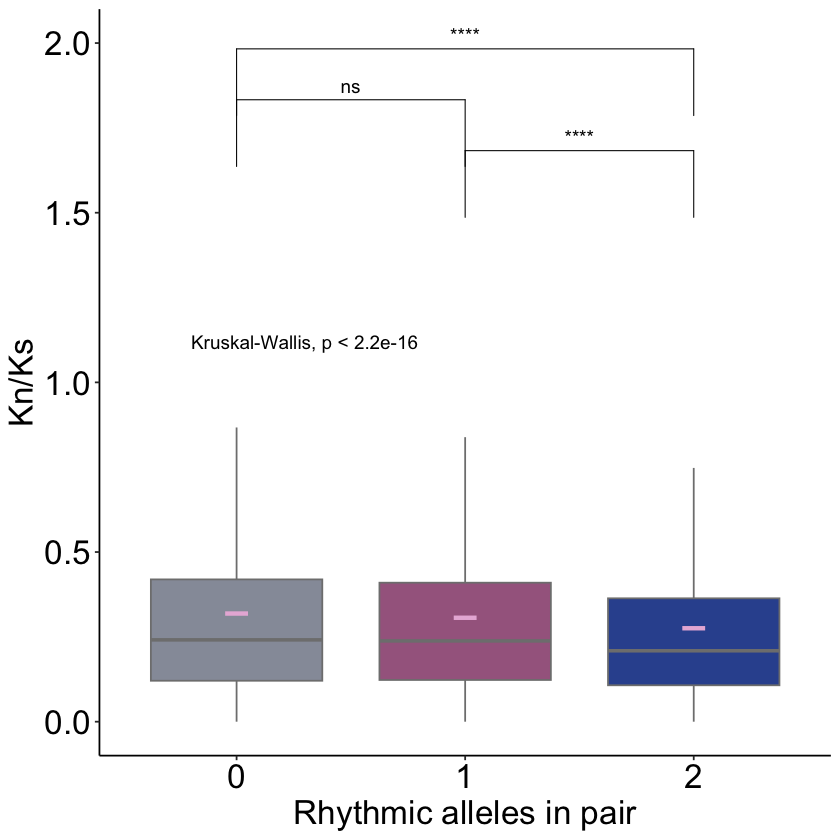

In [33]:
## USING SHORT DAY LEAF DATA ONLY
#:::::::::::::::::::::::::::::::::::::
CoGeSynt_CycAllelicPairs_Plot_stats_SD <- CoGeSynExprCyc  %>% 
            filter(Tissue == 'Leaf', Condition == 'SD') %>% 
            filter (!is.na(Syntelog)) %>% 
    
            filter( Ks> 0.001, Ks < 3) %>% ## PAT EDGER USES Ks<3 cut off

  mutate(Rhythmic_Alleles = case_when(ADJ.P1 < 0.001 & ADJ.P2 < 0.001 ~ '2',
                                        ADJ.P1 >= 0.001 & ADJ.P2 >= 0.001  ~ '0',
                                      ADJ.P1 < 0.001 & ADJ.P2 >= 0.001  ~ '1',
                                       ADJ.P1 >= 0.001 & ADJ.P2 < 0.001 ~'1')) %>% 

            mutate(Rhythmic_Alleles = factor(Rhythmic_Alleles, levels = c('0','1','2'))) %>%
            filter(!is.na(Rhythmic_Alleles)) %>%
           
                   ggplot(aes(x= Rhythmic_Alleles, y = Kn/Ks))+
  
            geom_boxplot( aes(col = 'black', fill = Rhythmic_Alleles), outlier.shape = NA)+  
    
      
            labs(y="Kn/Ks", x="Rhythmic alleles in pair")+
          
          coord_cartesian(ylim=c(0,2))+

stat_summary(fun = mean,
               geom = "crossbar", 
               width = 0.1,
             colour = "#E8B7DA")+  
                   
 
         scale_color_manual(values = c('2' = '#33539E',  ##1F449C #darker blue/grey
                                    '1'= '#A5678E',   ##7CA1CC
                                      '0' = '#969ba8'))+ # blue
    scale_fill_manual(values = alpha(c('2' = '#33539E', #darker blue/grey  '#1F449C'
                                    '1'= '#A5678E',   #7CA1CC
                                      '0' = '#969ba8')))+

                      
   
theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                strip.text.x = element_text(size = 20),
                #axis.text.x=element_text(angle=90,hjust=1,vjust = 0.3),
            legend.position="none")+


stat_compare_means(method= 'kruskal.test',label.y = c(1.1), size = 4) + #Kruskal-Wallis multiple comparisons

 stat_compare_means(comparisons = list(c('1','2'), c('1', '0'), c('2','0')),   #Kruskal-Wallis multiple comparisons
                    method = 'wilcox.test',       
                    p.adjust.method="bonferroni",
                          symnum.args = list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), 
                        symbols = c("****", "***", "**", "*", "ns")),
                        label.y = c(0.7, 0.85,1.0), size = 4,
                  tip.length = 0.01) # Adhoc pairwise comparisons p-value



CoGeSynt_CycAllelicPairs_Plot_stats_SD


#### Add statistics results using letter notation

In [34]:
label_KnKs<- data.frame( same = c('a', 'a', 'b'), 
                     Rhythmic_Alleles = c('0','1','2'))
                     

label_KnKs
label_KnKs$Rhythmic_Alleles<- as.factor(label_KnKs$Rhythmic_Alleles)


same,Rhythmic_Alleles
<chr>,<chr>
a,0
a,1
b,2


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


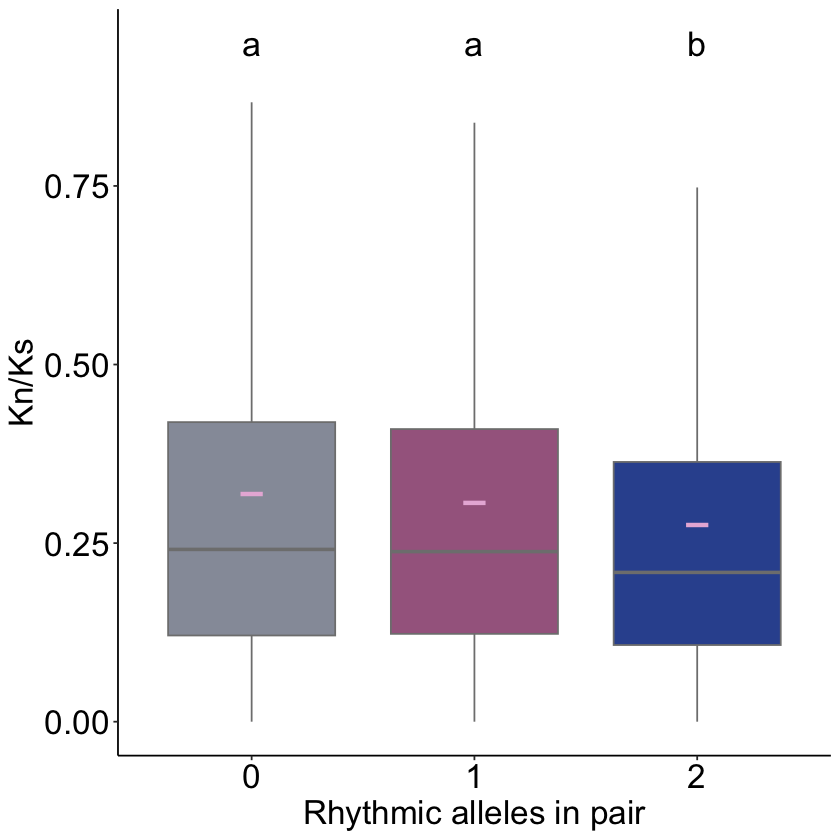

In [35]:
# Kn/Ks PLOT
# USING SHORT DAY LEAF DATA ONLY
#:::::::::::::::::::::::::::::::::::::
CoGeSynt_CycAllelicPairs_Plot_SD <- CoGeSynExprCyc  %>% 
            filter(Tissue == 'Leaf', Condition == 'SD') %>% 
            filter (!is.na(Syntelog)) %>% 
    
            filter( Ks> 0.001, Ks < 3) %>% ## PAT EDGER USES Ks<3 cut off

  mutate(Rhythmic_Alleles = case_when(ADJ.P1 < 0.001 & ADJ.P2 < 0.001 ~ '2',
                                        ADJ.P1 >= 0.001 & ADJ.P2 >= 0.001  ~ '0',
                                      ADJ.P1 < 0.001 & ADJ.P2 >= 0.001  ~ '1',
                                       ADJ.P1 >= 0.001 & ADJ.P2 < 0.001 ~'1')) %>% 

            mutate(Rhythmic_Alleles = factor(Rhythmic_Alleles, levels = c('0','1','2'))) %>%
            filter(!is.na(Rhythmic_Alleles)) %>%
           
                   ggplot(aes(x= Rhythmic_Alleles, y = Kn/Ks))+
  
            geom_boxplot( aes(col = 'black', fill = Rhythmic_Alleles), outlier.shape = NA)+  
    
            labs(y="Kn/Ks", x="Rhythmic alleles in pair")+
          
          coord_cartesian(ylim=c(0,0.95))+

stat_summary(fun = mean,
               geom = "crossbar", 
               width = 0.1,
             colour = "#E8B7DA")+  
                   
 
         scale_color_manual(values = c('2' = '#33539E',  ##1F449C #darker blue/grey
                                    '1'= '#A5678E',   ##7CA1CC
                                      '0' = '#969ba8'))+ # blue
    scale_fill_manual(values = alpha(c('2' = '#33539E', #darker blue/grey  '#1F449C'
                                    '1'= '#A5678E',   #7CA1CC
                                      '0' = '#969ba8')))+

                      
   
theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                strip.text.x = element_text(size = 20),
                #axis.text.x=element_text(angle=90,hjust=1,vjust = 0.3),
            legend.position="none")+


geom_text( data = label_KnKs, aes(label = same, x=Rhythmic_Alleles, y = 0.95), nudge_x=0, nudge_y=0,check_overlap=T, size = 7.2) # Need to multiply by 0.36 to adjust to the other text sizes





CoGeSynt_CycAllelicPairs_Plot_SD


In [36]:
CoGeSynt_CycAllelicPairs_Plot_SD %>% ggsave(file="./Results/CoGeSynt_CycAllelicPairs_Plot_SD.pdf", 
                            width=4, height=4.5, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


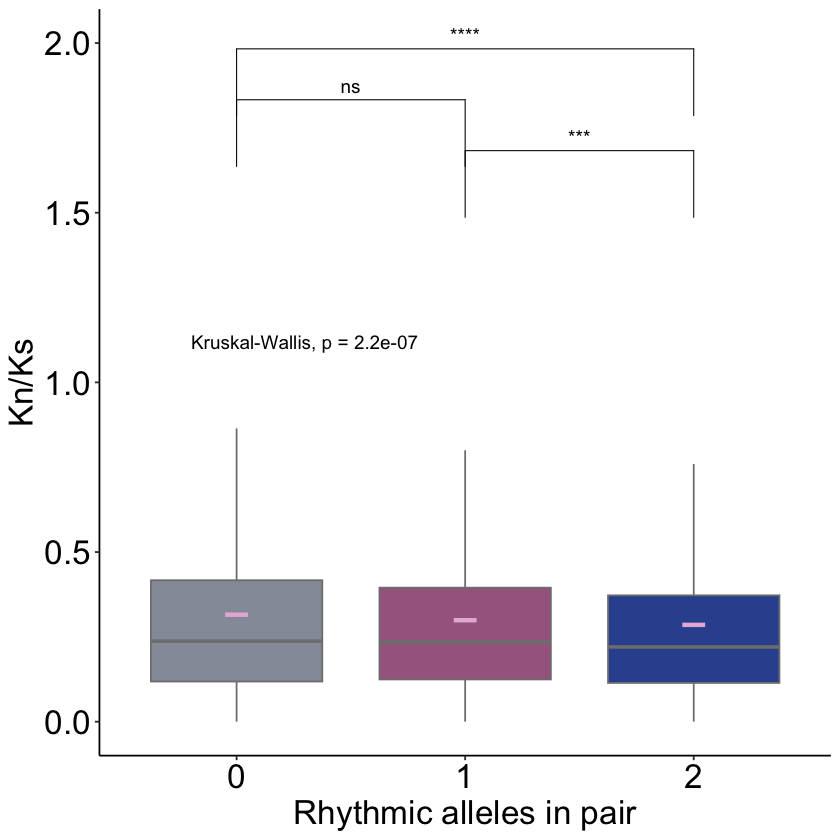

In [37]:
# Kn/Ks PLOT
# USING LONG DAY LEAF DATA ONLY
#:::::::::::::::::::::::::::::::::::::
CoGeSynt_CycAllelicPairs_Plot_stats_LD <- CoGeSynExprCyc  %>% 
            filter(Tissue == 'Leaf', Condition == 'LD') %>% 
            filter (!is.na(Syntelog)) %>% 
    
            filter( Ks> 0.001, Ks < 3) %>% ## PAT EDGER USES Ks<3 cut off

  mutate(Rhythmic_Alleles = case_when(ADJ.P1 < 0.001 & ADJ.P2 < 0.001 ~ '2',
                                        ADJ.P1 >= 0.001 & ADJ.P2 >= 0.001  ~ '0',
                                      ADJ.P1 < 0.001 & ADJ.P2 >= 0.001  ~ '1',
                                       ADJ.P1 >= 0.001 & ADJ.P2 < 0.001 ~'1')) %>% 

            mutate(Rhythmic_Alleles = factor(Rhythmic_Alleles, levels = c('0','1','2'))) %>%
            filter(!is.na(Rhythmic_Alleles)) %>%
           
                   ggplot(aes(x= Rhythmic_Alleles, y = Kn/Ks))+
  
            geom_boxplot( aes(col = 'black', fill = Rhythmic_Alleles), outlier.shape = NA)+  
    
      
            labs(y="Kn/Ks", x="Rhythmic alleles in pair")+
          
          coord_cartesian(ylim=c(0,2))+

stat_summary(fun = mean,
               geom = "crossbar", 
               width = 0.1,
             colour = "#E8B7DA")+  
                   
 
         scale_color_manual(values = c('2' = '#33539E',  ##1F449C #darker blue/grey
                                    '1'= '#A5678E',   ##7CA1CC
                                      '0' = '#969ba8'))+ # blue
    scale_fill_manual(values = alpha(c('2' = '#33539E', #darker blue/grey  '#1F449C'
                                    '1'= '#A5678E',   #7CA1CC
                                      '0' = '#969ba8')))+

                      
   
theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                strip.text.x = element_text(size = 20),
                #axis.text.x=element_text(angle=90,hjust=1,vjust = 0.3),
            legend.position="none")+


stat_compare_means(method= 'kruskal.test',label.y = c(1.1), size = 4) + #Kruskal-Wallis multiple comparisons

 stat_compare_means(comparisons = list(c('1','2'), c('1', '0'), c('2','0')),   #Kruskal-Wallis multiple comparisons
                    method = 'wilcox.test',       
                    p.adjust.method="bonferroni",
                          symnum.args = list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), 
                        symbols = c("****", "***", "**", "*", "ns")),
                        label.y = c(0.7, 0.85,1.0), size = 4,
                  tip.length = 0.01) # Adhoc pairwise comparisons p-value



CoGeSynt_CycAllelicPairs_Plot_stats_LD
